# 2.1 Introdução e conceitos fundamentais

Considere um sistema  de equações lineares 

$$ \begin{cases} 
	         a_{11}x_1 +a_{12}x_2 + \cdots + a_{1n}x_n = b_1\\ 
	         a_{21}x_1 +a_{22}x_2 + \cdots + a_{2n}x_n = b_2\\
	         \vdots   \\
	         a_{n1}x_1 +a_{n2}x_2 + \cdots + a_{nn}x_n = b_1\\
             \end{cases} $$

O qual pode ser escrito em notação compacta, na seguinte forma

$$  \sum_{j=1}^{n} a_{ij} x_j = b_i$$

com $i=1,2,...,n$. Ou, ainda, na forma de equação matricial

$$Ax=b$$

em que $A= (a_{ij})$ com $i,j=1,..,n$, é a matriz dos coeficientes, 
$x=(x_1,x_2,...,x_n)^t$ é o vetor de incógintas e $b=(b_1, b_2,...,b_n)^t$ é o vetor de termos independentes de  $x$. Então, tem-se

$$\left[\begin{array}{cccc} 
	         a_{11} & a_{12} & \cdots & a_{1n} \\ 
	         a_{21} & a_{22} & \cdots & a_{2n} \\
	         \vdots & \vdots & \vdots & \vdots \\
	         a_{n1} & a_{n2} & \cdots & a_{nn} \\
	         \end{array} \right]
\left[\begin{array}{c} 
	         x_1 \\ 
	         x_2 \\
             \vdots\\
	         x_n \\
	         \end{array} \right]
=
\left[\begin{array}{c} 
	         b_1 \\ 
	         b_2 \\
             \vdots\\
	         b_n \\
	         \end{array} \right]
	         $$



Resolver o sistema dado, consiste em encontrar o vetor solução $\overline x=(\overline x_1, \overline x_2,..., \overline x_n)^t$ que satisfaça todas as equações simultaneamente.

Graficamente em $R^2$, a solução de um sistema linear representa a intersecção das retas definidas pelas equações.



## Exemplo
O sistema linear 

$$ \begin{cases} 
	         -x_1 + 2x_2 = 3\\ 
              x_1 + x_2 = 3
             \end{cases} $$
             
tem uma única solução $\overline x= (1,2)^t$, como pode ser visto no gráfico abaixo.

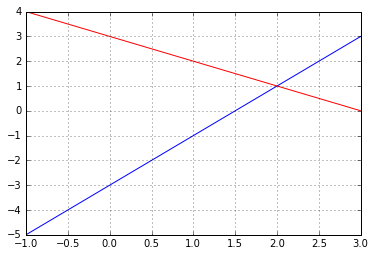

In [8]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
eq1 = lambda x: -3+2*x
eq2 = lambda x: 3-x
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota 
plt.plot(xi, eq1(xi), "-", xi, eq2(xi), "r-") 
plt.grid()
plt.show()

Já o sistema linear 

$$ \begin{cases} 
	         x_1 + x_2 = 1\\ 
             2x_1 + 2x_2 = 2
             \end{cases} $$
             
tem infinitas soluções já que as duas equações representam a retas coincidentes.

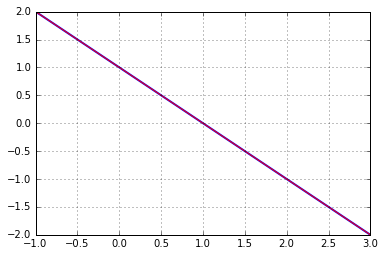

In [24]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
eq1 = lambda x: 1-x
eq2 = lambda x: (2-2*x)/2
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota 
plt.plot(xi, eq1(xi), "b-", linewidth= 2.0)
plt.plot( xi, eq2(xi), "r-", linewidth=1.0) 
plt.grid()
plt.show()

Por fim, o sistema linear 

$$ \begin{cases} 
	         x_1 + x_2 = 1\\ 
             2x_1 + 2x_2 = 4
             \end{cases} $$
             
Não tem nenhuma solução (sistema inconsistente) já que as duas equações representam a retas paralelas.

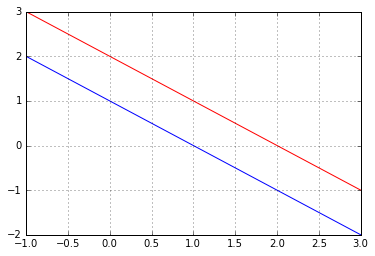

In [26]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
eq1 = lambda x: 1-x
eq2 = lambda x: (4-2*x)/2
# Lista de pontos para o plot
xi = np.linspace(-1,3,2)
# Plota 
plt.plot(xi, eq1(xi), "b-",  xi, eq2(xi), "r-") 
plt.grid()
plt.show()

## Sistemas triangulares

Sistemas lineares triangulares são aqueles cuja matriz dos coeficientes é uma matriz triangular. Em geral o algoritmo para resolução de sistemas triangulares é bastante simples e basea-se em substituições subsequentes. 

**Sistema triangular inferior**

Um sistema triangular inferior $Ax=b$ com coeficientes $(a_{ij})=0$ para $i<j$ e $a_{ij} \neq 0$, $i=0,1,...,n$ é representado por

$$ \begin{cases} 
	         a_{11}x_1 = b_1\\
	         a_{21}x_1 + a_{22}x_2 = b_2\\
	         a_{31}x_1 + a_{32}x_2 + a_{33}x_3= b_3\\
	         \vdots \\
	         a_{n1}x_1 + a_{n2}x_2 + a_{33}x_3 + \cdots + a_{nn}x_n= b_n\\
	         \end{cases} $$
             
pode ser resolvido usando o seguinte algoritmo:

$$ x_1 = b_1/a_{11}$$

para $i=2,3...,n$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=1}^{(i-1)} a_{ij}x_j}{a_{ii}}$$	         
	         
Usando Python, um código que implementa esse algoritmo, é mostrado abaixo:


In [26]:
A = [[2,0,0], [1,4,0], [1,1,1]] 
b = [2,-3,0]
x1 = b[0]/A[0][0]
x = [x1]

for i in range(1,len(A)):
    soma = 0
    for j in range(0,i):
        soma +=  A[i][j]*x[j]
    x.append((b[i]-soma)/A[i][i])
print (x)

[1.0, -1.0, 0.0]


**Sistema triangular superior**

Um sistema triangular superior $Ax=b$ com coeficientes $(a_{ij})=0$ para $i>j$ e $a_{ij} \neq 0$, $i=0,1,...,n$ é representado por

$$ \begin{cases} 
	         a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + \cdots + a_{2n}x_n = b_1\\
	         a_{22}x_2 + a_{23}x_3 + \cdots + a_{2n}x_n = b_2\\
	         a_{33}x_3 + \cdots + a_{3n}x_n = b_3\\
	         \vdots \\
	         a_{nn}x_n= b_n\\
	         \end{cases} $$
             
pode ser resolvido usando o seguinte algoritmo:

$$ x_n = b_n/a_{nn}$$

para $i=(n-1), (n-2),...,1$, faça

$$ x_i = \frac{b_i- \sum\limits_{j=i+1}^{(n)} a_{ij}x_j}{a_{ii}}$$	

Usando Python, um código que implementa esse algoritmo, é mostrado abaixo:

In [30]:
A = [[3,1,0], [0,2,-1], [0,0,3]] 
b = [4,2,0]

n = len(A)-1       #os indices correm de 0 ate n-1
xn = b[n]/A[n][n]

x = [0]*len(A)     # cria um vetor de zeros    
x[-1] = xn         # atribui xn na ultima posicao de x
    
for i in range(n-1,-1,-1):
    soma = 0
    for j in range(i+1,n+1):
        soma +=  A[i][j]*x[j]
    xi = (b[i]-soma)/A[i][i]
    x[i] = xi

print(x)

[1.0, 1.0, 0.0]
